# Using Linear Regression Coefficiants to select the Features by `Mr. Harshit Dawar!`

In [4]:
# Loading the Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.datasets import load_boston

In [5]:
 # Loading the Dataset

X, y = load_boston(return_X_y = True)

In [7]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [8]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [9]:
# Scaling the Dataset

X = StandardScaler().fit_transform(X)
X

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [10]:
# Creating the Feature Selector

Feature_Selector = SelectFromModel(LinearRegression())

Feature_Selector.fit(X, y)

SelectFromModel(estimator=LinearRegression())

In [11]:
# True represents that the Feature is selected

"""Selection Criteria by Default is that if the coefficient value is > mean value of all the available
coefficients, then the Feature is selected!"""

Feature_Selector.get_support()

array([False, False, False, False,  True,  True, False,  True,  True,
        True,  True, False,  True])

In [12]:
count = 0
for i in Feature_Selector.get_support():
    if i:
        count += 1

print("Total Features Present: {}\nTotal Features Selected: {}".format(X.shape[1],
                                                                       count
                                                                      ))

Total Features Present: 13
Total Features Selected: 7


In [13]:
# Printing the Coefficients for the Features!

Feature_Selector.estimator_.coef_

array([-0.92814606,  1.08156863,  0.1409    ,  0.68173972, -2.05671827,
        2.67423017,  0.01946607, -3.10404426,  2.66221764, -2.07678168,
       -2.06060666,  0.84926842, -3.74362713])

In [14]:
# Calcualting the Mean of the Features Weights or Coefficients

Feature_Selector.estimator_.coef_.mean()

-0.45081026238694916

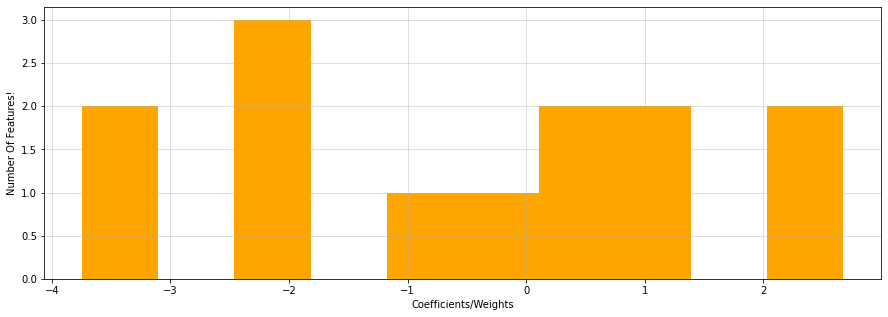

In [15]:
# Plotting the Histogram of the Coefficients Distribution!

pd.Series(Feature_Selector.estimator_.coef_.ravel()).plot.hist(figsize = (15, 5), color = "orange")
plt.xlabel("Coefficients/Weights")
plt.ylabel("Number Of Features!")
plt.grid(axis = "both", alpha = 0.5, animated = True)
plt.show()

***Some Values are positive & some are negative which is a very much normal behaviour, further let's plot the absolute value of coefficients & Number Of Features!***

In [16]:
# Calcualting the Mean of the Features Weights or Coefficients

np.abs(Feature_Selector.estimator_.coef_).mean()

1.6984088233992223